In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import MESS

# FUCKEDFFDDSSDFASDDADSFSD!!!!!!!!!
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SIMOUT='./SIMOUT_total.csv'
params = {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 80, 'bootstrap': True}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Look at variation among the simulations

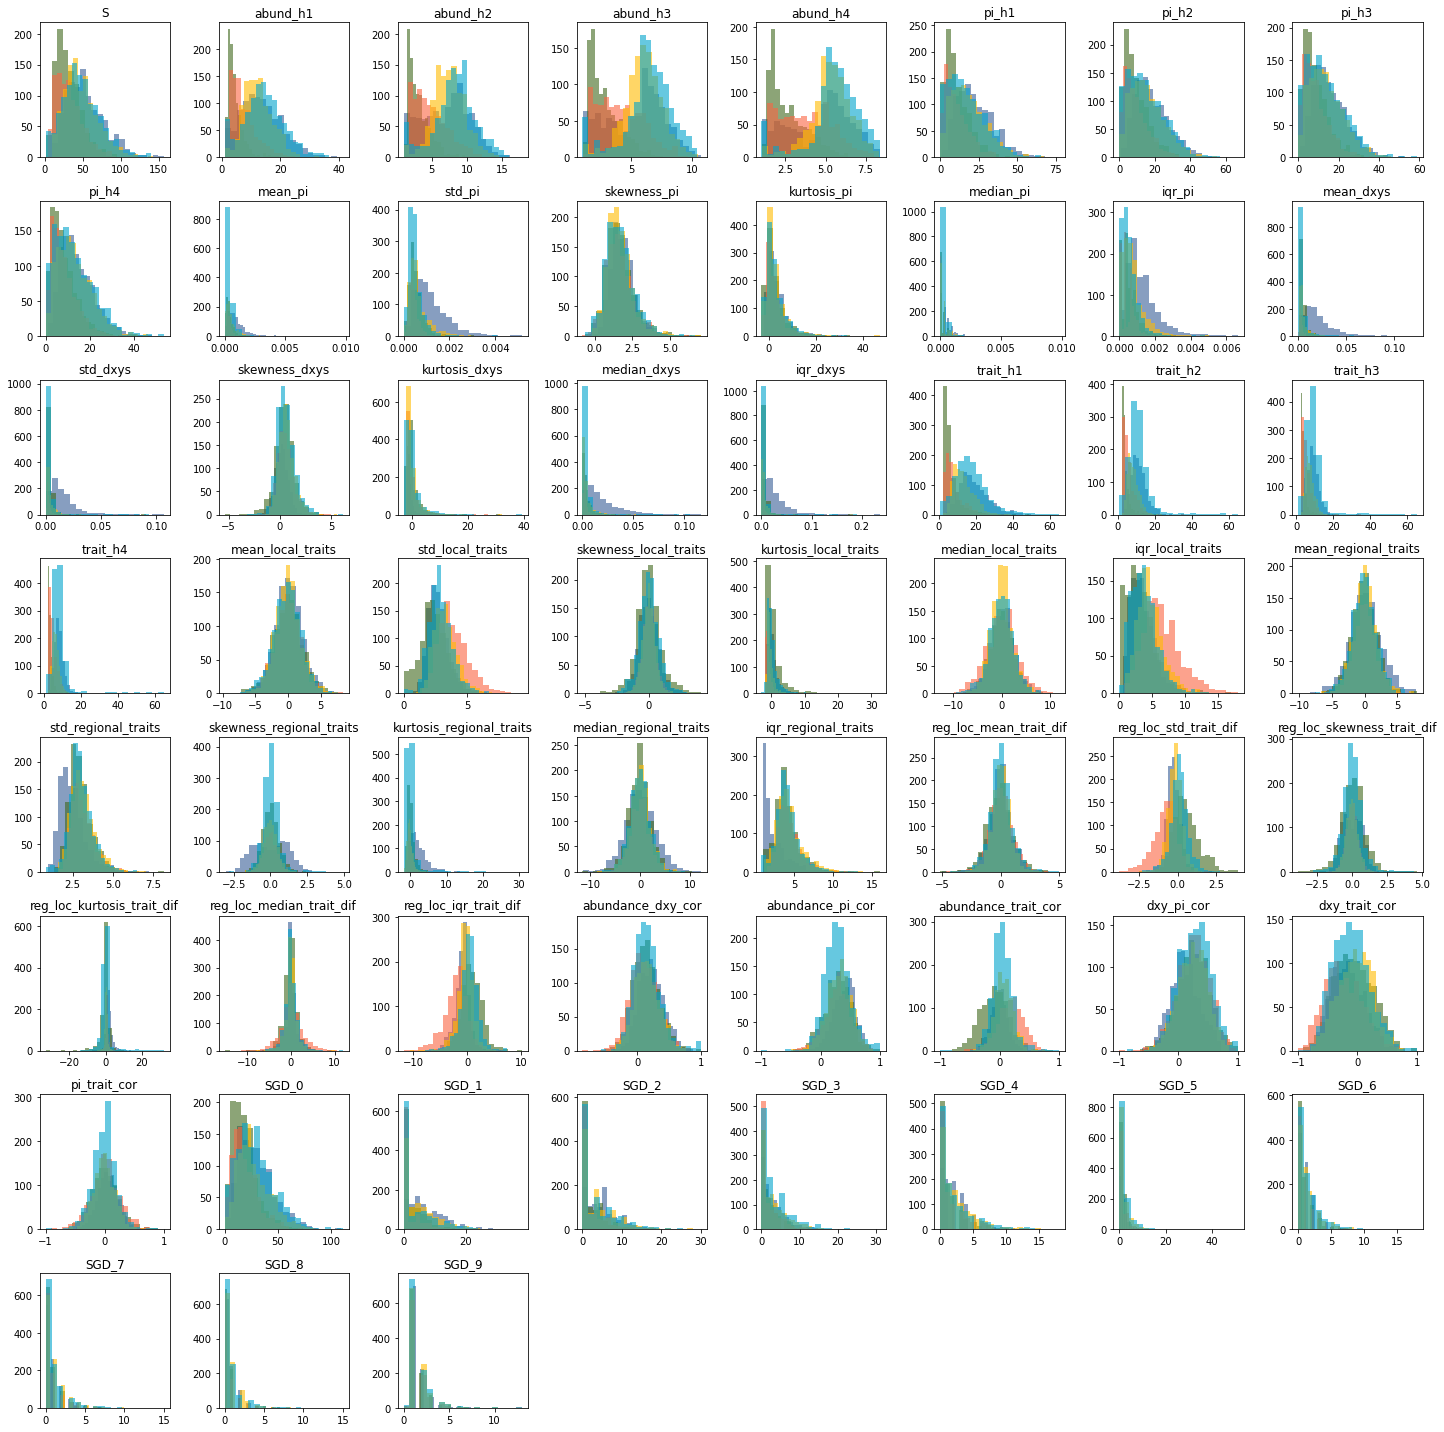

In [52]:
SIMOUT='./SIMOUT_total.csv'
_ = MESS.plotting.plot_simulations_hist(SIMOUT, nsims=50000, select=0.75, tol=0.05)

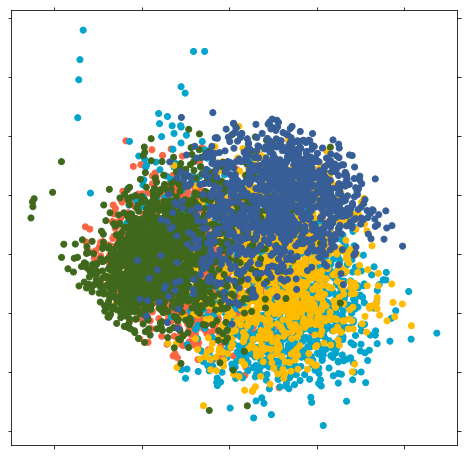

In [55]:
_ = MESS.plotting.plot_simulations_pca(SIMOUT, nsims=50000, select=0.95, tol=0.05)

## Look at variation in parameters

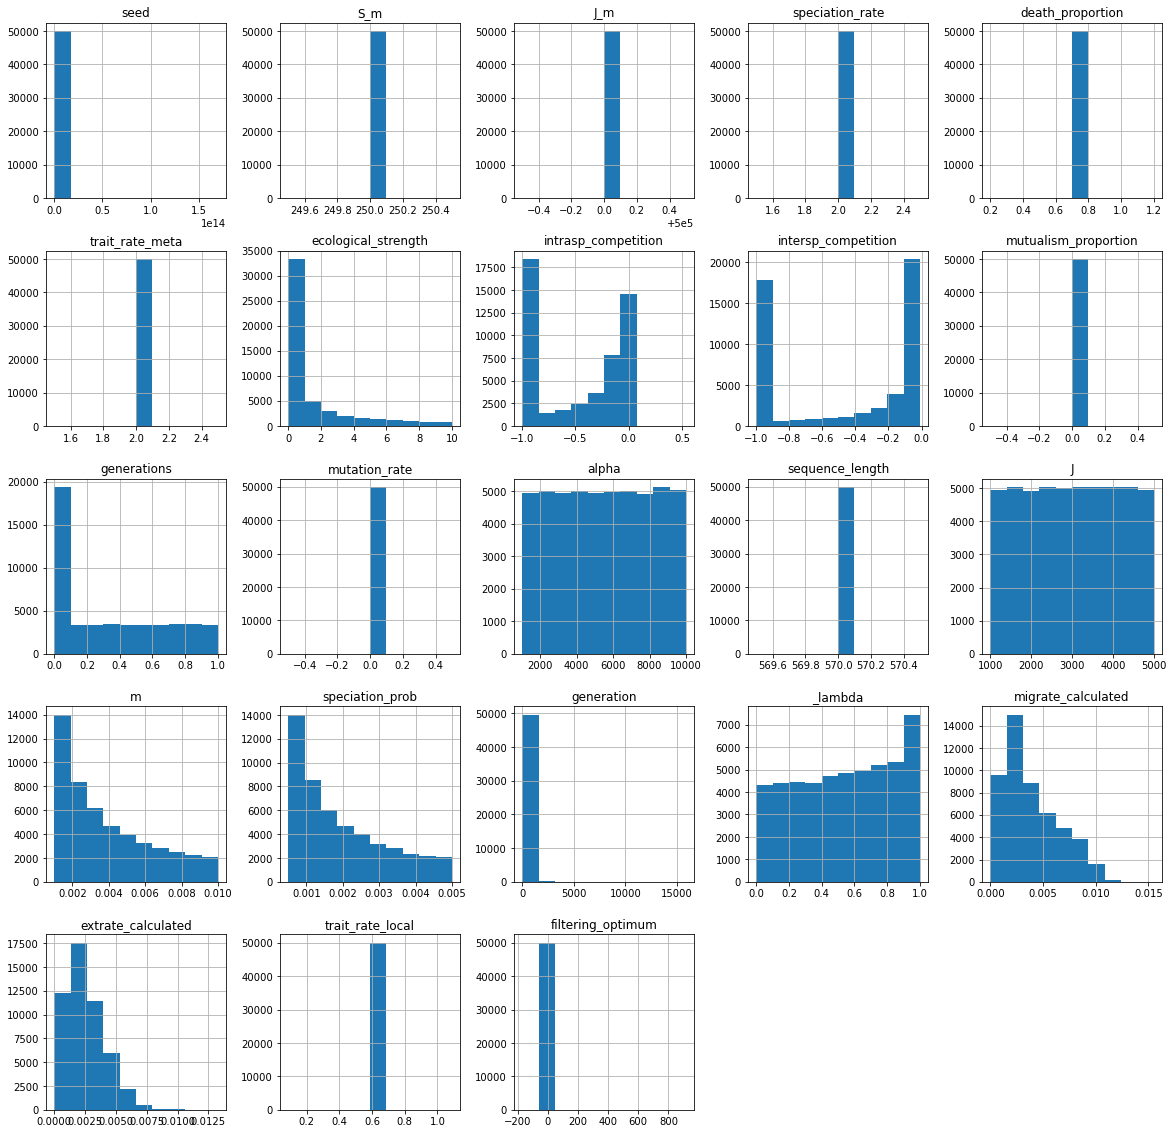

In [51]:
full_df = pd.read_csv(SIMOUT, sep="\t")
S_idx = list(full_df.columns).index("S")
params_df = full_df.iloc[:, :S_idx]
_ = params_df.hist(figsize=(20, 20))

In [58]:
params_df.head()

,seed,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition,intersp_competition,mutualism_proportion,...,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum
0,1.879357e+09,250.0,500000.0,2.0,0.7,2.0,0.03444,-0.01339,-0.01934,0.0,...,570.0,3154.0,0.00147,0.00224,24.00000,0.07356,0.00122,0.00269,0.58824,-0.00729
1,2.231610e+08,250.0,500000.0,2.0,0.7,2.0,0.61884,-0.02734,-0.09202,0.0,...,570.0,4759.0,0.00595,0.00064,11.99748,0.20403,0.00438,0.00336,0.58824,4.92143
2,2.044084e+09,250.0,500000.0,2.0,0.7,2.0,1.67868,-0.31434,-0.04068,0.0,...,570.0,1090.0,0.00275,0.00453,11.00000,1.00000,0.00300,0.00284,0.58824,-2.70691
3,1.428855e+08,250.0,500000.0,2.0,0.7,2.0,0.28378,-0.47833,-0.07348,0.0,...,570.0,3754.0,0.00974,0.00066,13.00000,0.78609,0.00869,0.00209,0.58824,-3.40622
4,1.398404e+09,250.0,500000.0,2.0,0.7,2.0,4.48710,-0.19296,-0.03100,0.0,...,570.0,4959.0,0.00180,0.00084,11.99758,0.77032,0.00188,0.00084,0.58824,-0.98017


In [2]:
data_trew = pd.read_csv('./empirical_data/Australian_trees/Washpool.csv')
cla_trew = MESS.inference.Classifier(data_trew, SIMOUT, algorithm="rf", verbose=True)

Got empirical summary statistics:
    S      pi_h1     pi_h2     pi_h3     pi_h4  mean_pi    std_pi  \
0  53  16.380663  10.18112  8.175528  7.235665  0.00006  0.000124   

   skewness_pi  kurtosis_pi  median_pi  ...  SGD_0  SGD_1  SGD_2  SGD_3  \
0     3.293799    11.310765   0.000016  ...     43      4      2      0   

   SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9  
0      1      1      1      0      0      1  

[1 rows x 29 columns]
No features previously selected, using all.


In [7]:
res_trew, proba_trew = cla_trew.predict(quick=False, params=params, verbose=True, select_features=False, param_search=False)
proba_trew
cla_trew.best_model

Predict() started: 2020-10-12 06:07:28.106063


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
cla_trew.best_model
cl = sklearn.ensemble.RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [18]:
cla_trew.param_search_cv(by_target=False, quick=True, verbose=True)
#cla_trew.best_model.predict(cla_trew.empirical_sumstats)
cla_trew.best_model

Finding best model parameters.
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    7.6s remaining:   30.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.2s finished
/home/isaac/miniconda2/envs/MESS-interaction/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 110, 'bootstrap': False}


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
cla_trew.best_model.predict_proba(cla_trew.empirical_sumstats)


array([[0.15927083, 0.30072917, 0.11302083, 0.19604167, 0.2309375 ]])

## Cross validation for classification using pi and traits (tree/snail data)

<AxesSubplot:xlabel='Predicted assembly model class', ylabel='True assembly model class'>

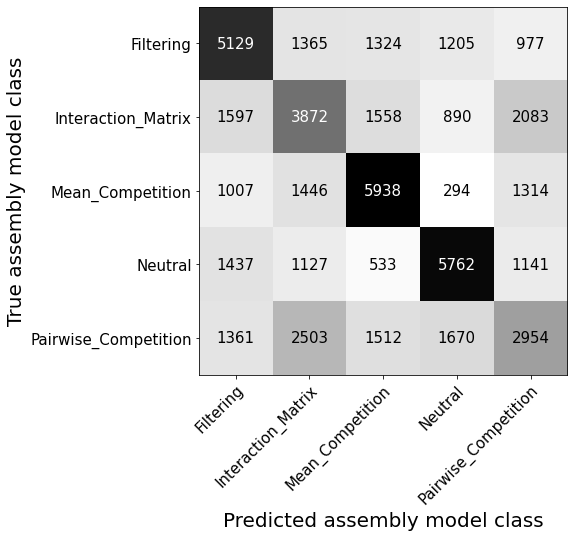

In [57]:
cla_trew.cross_val_predict()
cla_trew.plot_confusion_matrix()

## Cross validation for classification using pi and abundance (spider/weevil data)

In [63]:
data_sp = pd.read_csv('./empirical_data/Reunion_spiders/spider.dat')
cla_sp = MESS.inference.Classifier(data_sp, SIMOUT, algorithm="rf", verbose=True)
est_sp, prob_sp = cla_sp.predict(quick=False, verbose=True, select_features=False, param_search=False, params=params)


Got empirical summary statistics:
    S   abund_h1   abund_h2   abund_h3  abund_h4      pi_h1      pi_h2      pi_h3      pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  trees  abundance_pi_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  57  22.334174  14.092503  10.622744  8.877024  27.956422  21.660417  19.178423  17.853145  0.008283  0.010581      1.41016     0.756963   0.003258  0.01004      0          0.413119     32      7      5      0      2      4      1      3      1      2
No features previously selected, using all.
Predict() started: 2020-10-13 09:01:35.456478
Predict() finished: 2020-10-13 09:01:50.412560


<AxesSubplot:xlabel='Predicted assembly model class', ylabel='True assembly model class'>

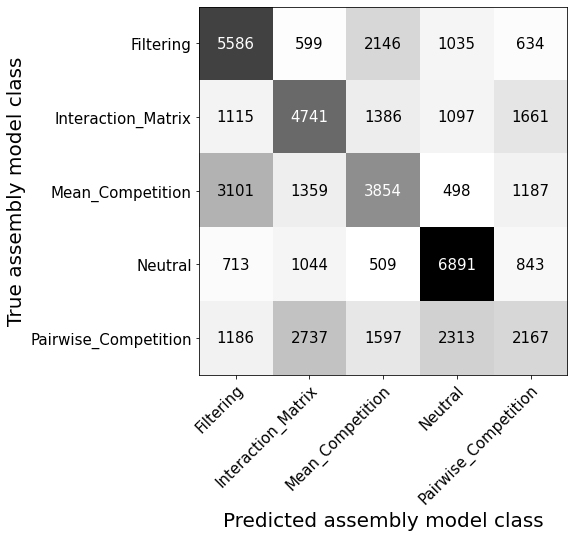

In [64]:
cla_sp.cross_val_predict()
cla_sp.plot_confusion_matrix()